In [1]:
import sys
import os
import glob
from pathlib import Path
sys.path.append('./extract_patches.py')
import extract_patches as ep
from matplotlib import pyplot as plt
import numpy as np
import time
from PIL import Image
import cv2 
os.getcwd()

Error


NameError: name 'opts' is not defined

In [ ]:
class Timer:
    def __init__(self):
        self._begin_time = None

    def tic(self):
        self._begin_time = time.perf_counter()

    def toc(self):
        return time.perf_counter() - self._begin_time

def show_info(x,show_values = False):
    length = 'no length'
    keys = 'not a dict'
    values = 'not a dict'
    shape = 'not a ndarray'
    size = 'not a ndarray'
    if hasattr(x,'__len__'):
        length = len(x)
    if isinstance(x,dict):
        keys = x.keys()
        values = x.values()
    if type(x) is np.ndarray:
        shape = x.shape
        size = x.size
    print(f'type:{type(x)} \nlen:{length}\nshape:{shape}\nsize:{size}\nkeys:{keys}\noriginal info:{x}')
    if show_values:
        print(f'\nvalues:{values}')

def null_or_not(x,pr = False):  #只要有一个元素不为0则不为0
    if type(x) is not np.ndarray:
        x = np.array(x)
    if pr:
        if x.any():
            print('not all 0')
        else:
            print('all 0')
    return x.any()

def show_dzg_info(dzg):
    print(f'level count:{dzg.level_count}')
    print(f'tile arrangement of last 3 level{dzg.level_tiles[-4:-1]}\ndimensions of each tile at last 3 level:{dzg.level_dimensions[-4:-1]}')

def pop_tile(dzg,level,save = False):
    row,col = dzg.level_tiles[level]
    saved = []
    if level<0:
        level = dzg.level_count + level
    for i in range(row):
        for j in range(col):
            if null_or_not(dzg.get_tile(level,(i,j))):
                saved.append((i,j))
                if not save:
                    print((i,j))
    if save:
        return saved

def onehot_pic(image,threshold):
    image = np.array(image)
    image[image>threshold] = 255
    return Image.fromarray(image)

def imgshow(img_path):
    tiff = cv2.imread(img_path)
    plt.imshow(Image.fromarray(tiff))

In [ ]:
root_path = {
    'server':'/mnt/wangyh/TCGA_svs/',
    'desktop':'I:\\TCGA_bladder\\TCGA_bladder\\',
    'laptop':''
}
file_id = 'f4ca3ddd-dc53-4ab0-b55b-942603b64e57' + '/'
timer = Timer()

In [18]:
file_path = root_path['server'] + file_id
svs_path = glob.glob(file_path + '*.svs')[0]
xml_path = glob.glob(file_path + '*.xml')[0]

/home/wangyh/uro_biomarker/patho_AI/processing/extract_patches.py:120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  contours = np.array(mask_coords[cls])


21.99966322304681


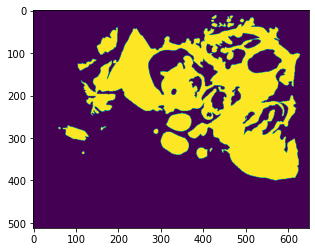

In [19]:
timer.tic()
slide = ep.get_slide(svs_path) #svs_path是一个list
mask_coords,classes = ep.AnnotationParser(xml_path)
rule =  {"tumor":{"excludes":["artificial","stroma","necrosis"]},
        'stroma':{"excludes":['artificial','necrosis']}}

annos = ep.Annotation(slide,xml_path,rule=rule)
masked_tumor = ep.show_thumb_mask(annos['tumor'])
tumor_slide = ep.get_mask_slide(annos) #返回一个Imageslide类
print(timer.toc())

In [20]:
# timer.tic
# tumor_thumbnail = tumor_slide.get_thumbnail((1000,500))
# timer.toc

In [21]:
# figure = plt.figure(figsize=(25,10))
# original = plt.subplot(131)
# original.imshow(slide.get_thumbnail((1000,500)))
# mask = plt.subplot(132)
# mask.imshow(masked_tumor)
# tumorslide = plt.subplot(133)
# tumorslide.imshow(tumor_thumbnail)

In [22]:
# TILE_SIZE = 512
# slide_tiles,tumor_tiles = ep.get_tiles(slide,tumor_slide,tile_size = TILE_SIZE)

In [ ]:
# tumor_tile_list = pop_tile(tumor_tiles,-3,save = True)
# tumor_tile_list

In [24]:
# onehot_pic(tumor_tiles.get_tile(16,(12,49)),0)  

In [25]:
scales = ['5X','10X','20X','40X']
extracted_case = []
un_extracted_case = []
tile_path = '../config/'
level_count = slide_tiles.level_count
levels=[level_count-4,level_count-3,level_count-2,level_count-1]
try:
    ep.extract_patches(levels,scales,tile_path,slide_tiles,tumor_tiles)
    extracted_case.append(file_path)
except Exception as e:
    un_extracted_case.append(file_path)
    print("something is wrong when extracting")
    print("ERROR!",e)

processing ---level 5X
../config/


KeyboardInterrupt: 

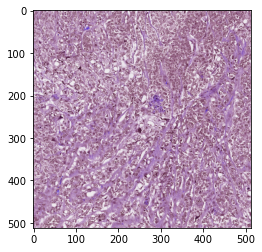

In [6]:
# tiff = cv2.imread('../config/5X/10_3.tiff',1)
# plt.imshow(Image.fromarray(tiff))

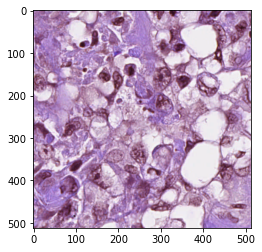

In [9]:
# path_10 = '../config/10X/10_25.tiff' 
# path_20 = '../config/20X/100_10.tiff'
# path_40 = '../config/40X/100_33.tiff'
# imgshow(path_40)

In [ ]:
path_non_5 = ''

In [33]:
def exclude_masks(masks,rule,classes):
    #masks_exclude = masks.copy()
    masks_exclude = masks
    for cls in classes:
        for exclude in rule[cls]["excludes"]:
            if exclude in masks:
                overlap_area = cv2.bitwise_and(masks[cls],masks[exclude])
                masks_exclude[cls] = cv2.bitwise_xor(masks[cls],overlap_area)
    #masks = masks_exclude
    return masks_exclude

In [34]:

if rule:
    classes = list(set(classes) & set(rule.keys()))
    masks = exclude_masks(masks,rule,classes)
    #include_masks(rule)
    #exclude_masks(rule)

NameError: name 'masks' is not defined

In [35]:
rule =  {"tumor":{"excludes":["artificial","stroma","necrosis"]},
        'stroma':{"excludes":['artificial','necrosis']}}

In [37]:
set(rule.keys())

{'stroma', 'tumor'}